# Salary Data Linear Regression 

This notebook contains a linear regression analysis of a Salary prediction data from Kaggle. The dataset contains only 30 records of the data in 2 columns, years of working experience and corresponding salary. Short exploratory analysis was firstly done on the dataset to see the general distribution with pandas, after which the data was visualized using seaborn and matplotlib libraries. The linear regression was then fit to the data, residuals calculated and compared to the mean salary values. The distribution of the data was then checked using the histograms and QQ plots. However, due to the small amount of data that is given in the dataset, the information about the distribution of the couldn't be accurately assessed. Given model fits the data quite well, howecer, more data is needed to give an adequate estimation of the linear model performance in such scenario. 

Dataset link: https://www.kaggle.com/datasets/krishnaraj30/salary-prediction-data-simple-linear-regression

In [100]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import pylab
import scipy.stats as stats
from stats import probplot

In [36]:
df = pd.read_csv('Salary_Data.csv')

In [37]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [39]:
df.describe() # to get the main distribution stats

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Relationship between years of experience and salary')

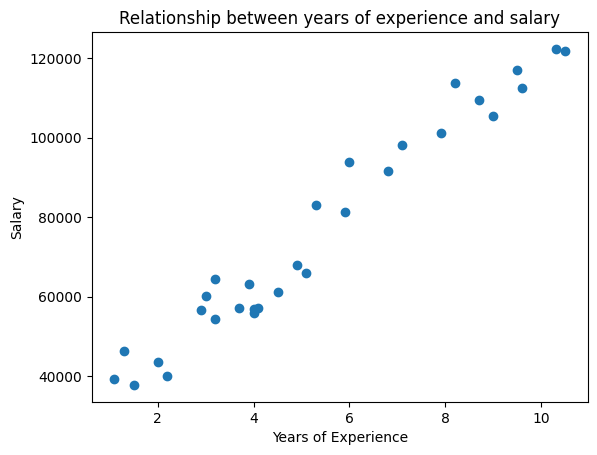

In [40]:
# Exploratory Data Analysis

X = pd.DataFrame(df['YearsExperience']) # DataFrame object is required by the functions below
y = df['Salary']

plt.scatter(X, y) # Create the scatter plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Relationship between years of experience and salary')

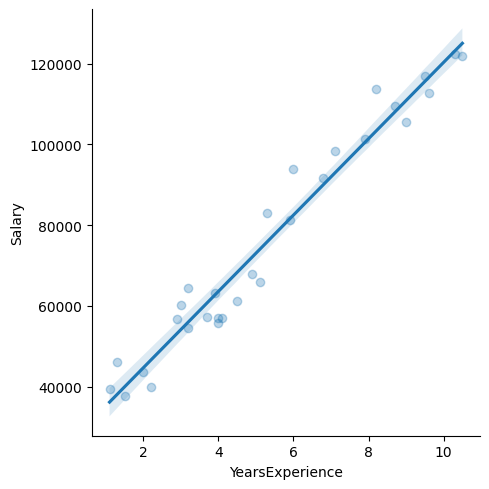

In [41]:
sns.lmplot(x = 'YearsExperience', # Fit the linear regression line to the data
           y = 'Salary', 
           data = df,
           scatter_kws = {'alpha': 0.3}) 

In [42]:
# Train the model

lm = LinearRegression()
lm.fit(pd.DataFrame(X), y) # DataFrame object is required when fitting Linear Regression

LinearRegression()

In [50]:
predictions = lm.predict(X)
pred_actual = pd.DataFrame({
    'Predicted Values': predictions,
    'Actual Values': y
})

pred_actual.head()

,Predicted Values,Actual Values
0,36187.158752,39343.0
1,38077.151217,46205.0
2,39967.143681,37731.0
3,44692.124842,43525.0
4,46582.117306,39891.0


In [ ]:
# Calculate the MAE, MSE, RMSE and the percentage errors relative to the salary mean

In [87]:
print('Mean Absolute Error:', mean_absolute_error(y, predictions).round(1), '| Percentage error relative to mean:', (mean_absolute_error(y, predictions) / y.mean()).round(3))
print('Mean Squared Error:', mean_squared_error(y, predictions).round(1), '| Percentage error relative to mean:', (mean_squared_error(y, predictions) / y.mean()).round(3))
print('Root Mean Squared Error:', round(math.sqrt(mean_squared_error(y, predictions)), 1), '| Percentage error relative to mean:', round(math.sqrt(mean_squared_error(y, predictions) / y.mean()),1))

Mean Absolute Error: 4644.2 | Percentage error relative to mean: 0.061
Mean Squared Error: 31270951.7 | Percentage error relative to mean: 411.444
Root Mean Squared Error: 5592.0 | Percentage error relative to mean: 20.3


In [88]:
residuals = y - predictions # Calculate residuals
residuals

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
Name: Salary, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


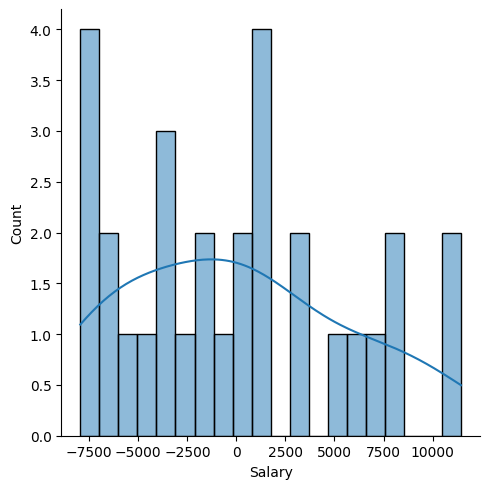

In [94]:
sns.displot(residuals, bins = 20, kde = True) # Plot the distribution

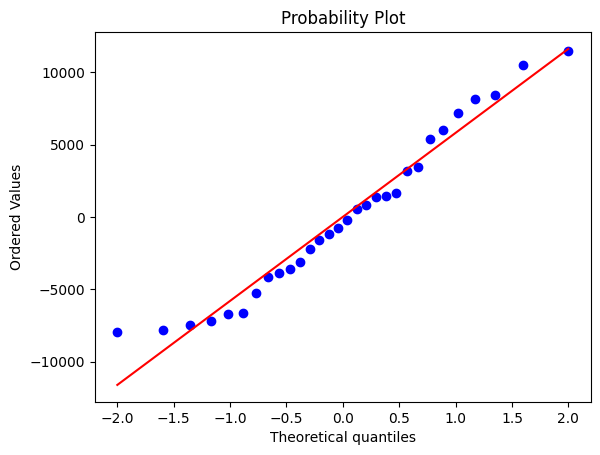

In [102]:
stats.probplot(residuals, dist = 'norm', plot = pylab) # plot the QQ plot
pylab.show()